In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

In [12]:
data = pd.read_csv('../Dataset Pre-processing/synthetic_heart_attack_data_balanced_preprocess.csv')

In [13]:
# Display dataset overview
print("Dataset Overview:")
print(tabulate(data.head(), headers="keys", tablefmt="pretty"))

Dataset Overview:
+---+---------------+-------------------+-------------------+-------------------+--------------------+--------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+--------------------+-------------------+
|   | Device_Status |  Heart_Rate_BPM   |      HRV_ms       |  SpO2_Percentage  | Skin_Temperature_C |      EDA_GSR       | Ambient_Temperature_C | Humidity_Percentage |        IMU_X        |        IMU_Y        |        IMU_Z        |    Stress_Level    | Heart Attack Risk |
+---+---------------+-------------------+-------------------+-------------------+--------------------+--------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+--------------------+-------------------+
| 0 |    Offline    | 75.91356228287715 | 86.57217828387414 | 99.91098757052048 | 37.47956971235035  | 1.7552157142417484 |   34.5638093768282    | 57.

In [14]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Device_Status          50000 non-null  object 
 1   Heart_Rate_BPM         50000 non-null  float64
 2   HRV_ms                 50000 non-null  float64
 3   SpO2_Percentage        50000 non-null  float64
 4   Skin_Temperature_C     50000 non-null  float64
 5   EDA_GSR                50000 non-null  float64
 6   Ambient_Temperature_C  50000 non-null  float64
 7   Humidity_Percentage    50000 non-null  float64
 8   IMU_X                  50000 non-null  float64
 9   IMU_Y                  50000 non-null  float64
 10  IMU_Z                  50000 non-null  float64
 11  Stress_Level           50000 non-null  float64
 12  Heart Attack Risk      50000 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 5.0+ MB
None


In [15]:
# Display summary statistics
print("\nSummary Statistics:")
summary_stats = data.describe()
print(tabulate(summary_stats, headers="keys", tablefmt="pretty"))


Summary Statistics:
+-------+--------------------+--------------------+-------------------+--------------------+--------------------+-----------------------+---------------------+----------------------+------------------------+-----------------------+--------------------+--------------------+
|       |   Heart_Rate_BPM   |       HRV_ms       |  SpO2_Percentage  | Skin_Temperature_C |      EDA_GSR       | Ambient_Temperature_C | Humidity_Percentage |        IMU_X         |         IMU_Y          |         IMU_Z         |    Stress_Level    | Heart Attack Risk  |
+-------+--------------------+--------------------+-------------------+--------------------+--------------------+-----------------------+---------------------+----------------------+------------------------+-----------------------+--------------------+--------------------+
| count |      50000.0       |      50000.0       |      50000.0      |      50000.0       |      50000.0       |        50000.0        |       50000.0      

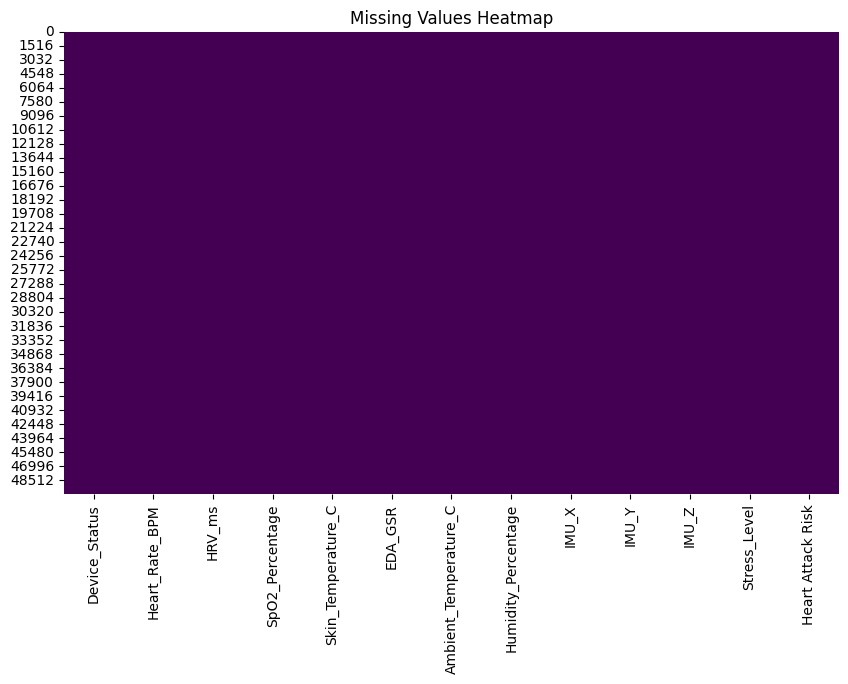

In [16]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
print("\nDuplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()


Duplicate Rows: 12499


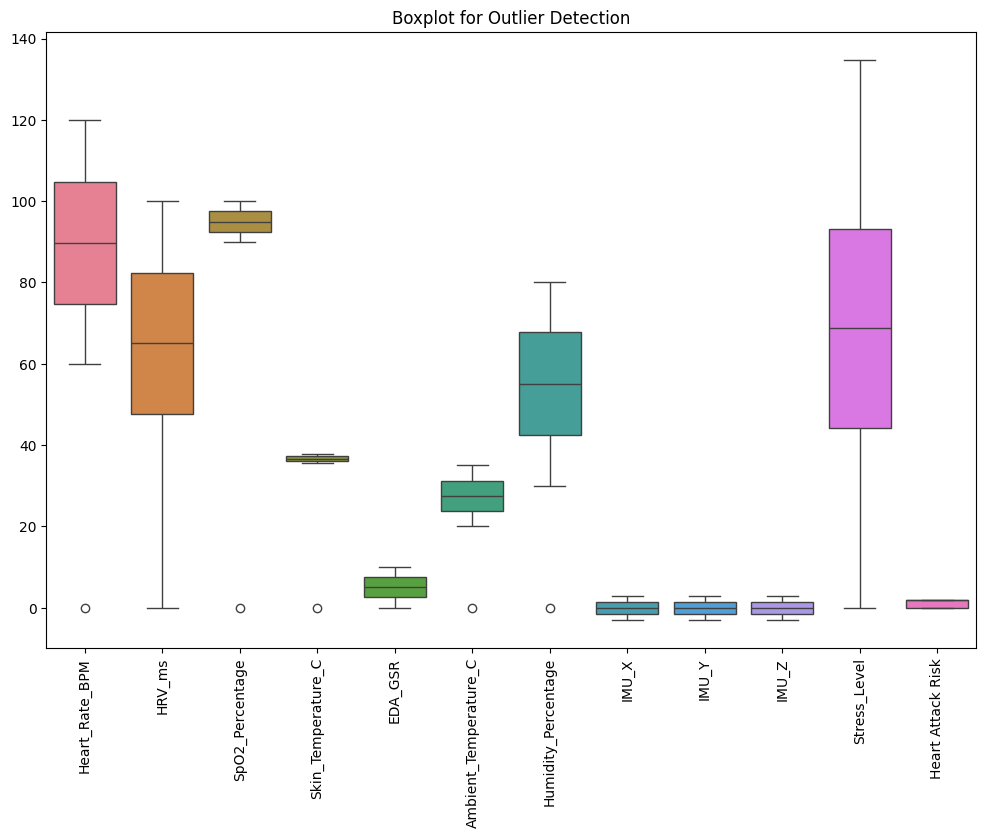

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

In [19]:
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

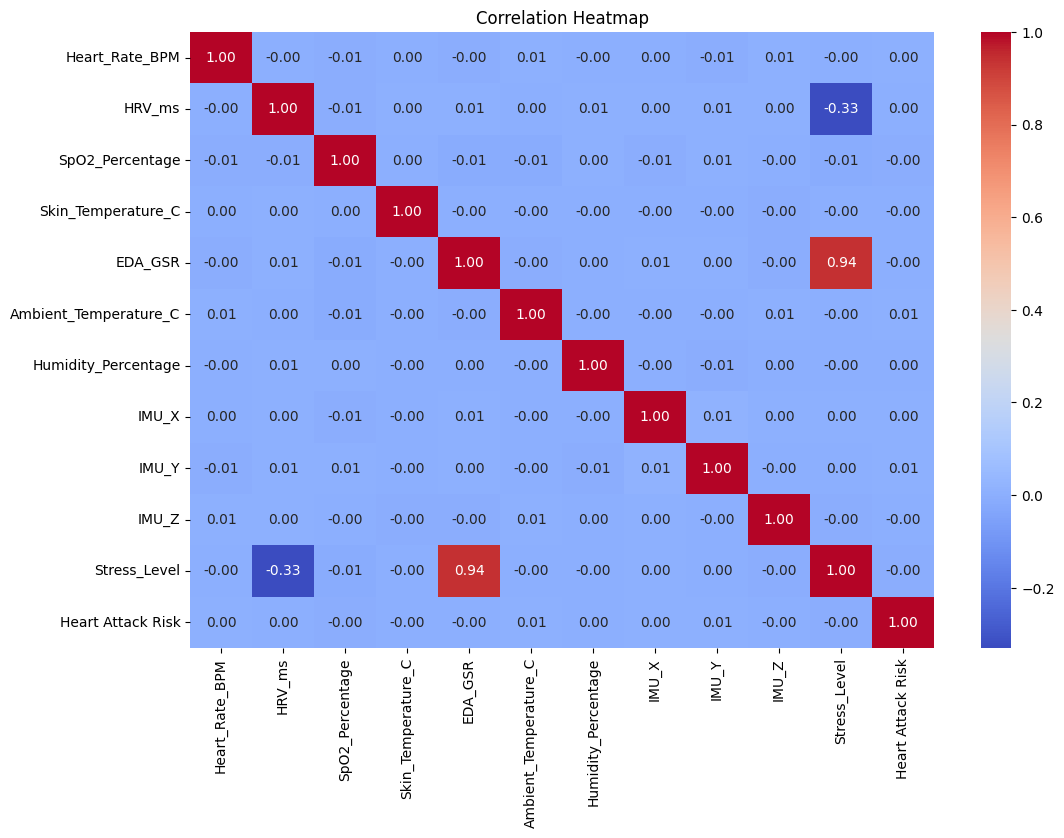

In [20]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Check if there are enough numeric columns
if numeric_data.shape[1] >= 2:
    # Compute correlation and plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data for correlation heatmap.")